# Another Kernel

This is another kernel of homework1

## Dataset

This dataset is an interesting survey.

Whether coffee will affect code efficiency or not.

Dataset is from [here](https://www.kaggle.com/devready/coffee-and-code)
 **only 100 data, not much**

In [65]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# import local file
import os 


In [66]:
# Read data
data_path = "./CoffeeAndCodeLT2018.csv"
df = pd.read_csv(data_path)

# drop unnecessary data
df=df.drop(["Country","AgeRange"],axis=1)
df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female
1,3,2,Before coding,Yes,Americano,Yes,Female
2,5,3,While coding,No,Nescafe,Yes,Female
3,8,2,Before coding,No,Nescafe,Yes,Male
4,10,3,While coding,Sometimes,Turkish,No,Male


## Overview

Take an overview of Lebanese programmers

In [136]:
print("each programmer spends " + str(df.sum()["CodingHours"]/len(df))+ " coding per day") 
print("each programmer consumes "+ str(df.sum()["CoffeeCupsPerDay"]/len(df))+" cups of coffee per day")

each programmer spends 6.41 coding per day
each programmer consumes 2.89 cups of coffee per day


## Draw correlation map
Draw an correlation map to see whether it has strong relation or not.

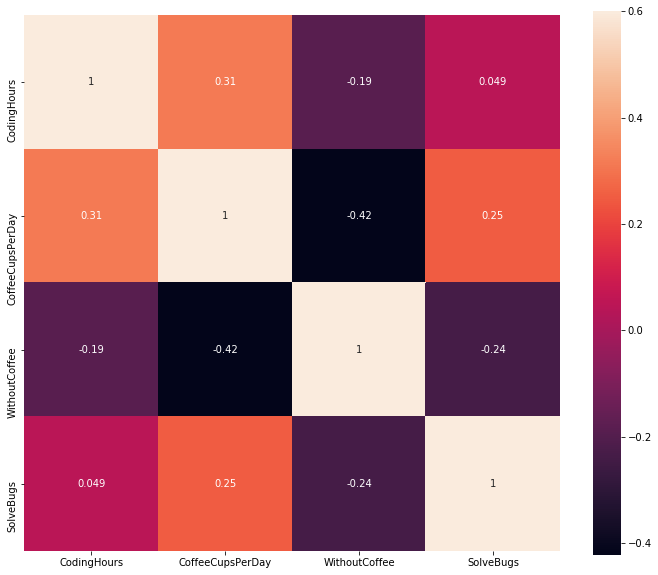

In [68]:
# Numeralize some data to draw correlation
solveBugs=[]
withoutCoffee=[]
for index, row in df.iterrows():
    if row["CodingWithoutCoffee"]=="Yes":
        withoutCoffee.append(1)
    elif row["CodingWithoutCoffee"]=="Sometimes":
        withoutCoffee.append(0.5)
    else:
        withoutCoffee.append(0)
    if row["CoffeeSolveBugs"]=="Yes":
        solveBugs.append(1)
    elif row["CoffeeSolveBugs"]=="Sometimes":
        solveBugs.append(0.5)
    else:
        solveBugs.append(0)

df['WithoutCoffee'] = pd.Series(withoutCoffee, index=df.index)
df['SolveBugs'] = pd.Series(solveBugs, index=df.index)

plt.figure(figsize=(12,10))
heatmap=sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

We can see small relation(0.25) at SolveBugs and CoffeeCupsPerDay.  Maybe coffee has some effect when solving bugs.

And negative relation(-0.24) at SolveBugs and WithoutCoffee.


## Inspect

Inspect people is concenterated in which interval

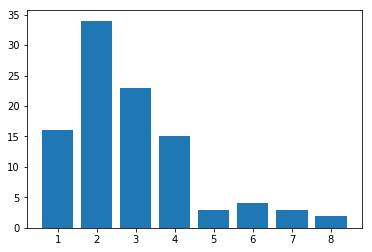

In [69]:
cupsPerDay=df["CoffeeCupsPerDay"].value_counts()
plt.bar(cupsPerDay.index.tolist(),cupsPerDay.values.tolist())
plt.show()

Programmers drink mainly 1~4 cups of coffee in this survey according from bar chart.

We use 1~4 cups to inspect whether coffee will help programmers solve bugs or not.

## Coffee & solve bugs 
Use a function to draw plot of each cups

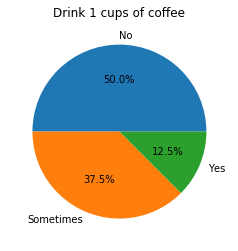

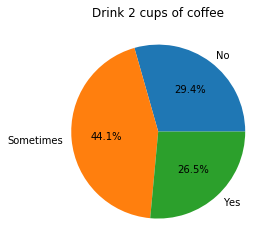

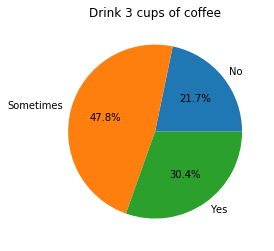

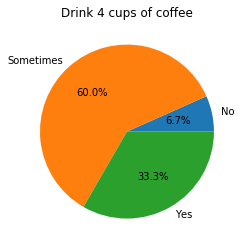

In [151]:
def plotCoffeeSolveBugs(cups):
    for item in cups:
        solveBugs=df[df['CoffeeCupsPerDay'].isin([item])]["CoffeeSolveBugs"].value_counts()

        solveBugs=solveBugs.sort_index()
        plt.title("Drink "+str(item)+" cups of coffee")
        plt.pie(solveBugs.values.tolist(),labels=["No","Sometimes","Yes"],autopct='%1.1f%%')
        plt.show()

plotCoffeeSolveBugs([1,2,3,4])


We can tell from graph that more coffee may affect the feeling of solving bugs.

For programmers drink 1 cup, the ratio of coffee help solving bugs or not is 12.5%:50% (1:4).

For programmers drink 4 cups, the ratio raises to 33.3%:6.7% (5:1).

